In [1]:
# 使用するライブラリのインポート
import pandas as pd
import numpy as np 
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


ratings = pd.read_csv('/Users/hayate/Downloads/anime-recommendations-database/rating.csv')
anime = pd.read_csv('/Users/hayate/Downloads/anime-recommendations-database/anime.csv')
print(ratings.head())

# animeのデータフレームをmemberの値で並び替え
print(anime.sort_values('members', ascending= False)[:10])
# animeの基本統計量の確認
print(round(anime.describe(),2))
# ratingsの基本統計量の確認
print(round(ratings.describe(),2))




   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4        1       241      -1
     anime_id                              name  \
40       1535                        Death Note   
86      16498                Shingeki no Kyojin   
804     11757                  Sword Art Online   
1        5114  Fullmetal Alchemist: Brotherhood   
159      6547                      Angel Beats!   
19       1575   Code Geass: Hangyaku no Lelouch   
841        20                            Naruto   
3        9253                       Steins;Gate   
445     10620                  Mirai Nikki (TV)   
131      4224                         Toradora!   

                                                 genre type episodes  rating  \
40   Mystery, Police, Psychological, Supernatural, ...   TV       37    8.71   
86        Action, Drama, Fantasy, Shounen, Super Power   TV       25    8.54   
804          Action, Adv

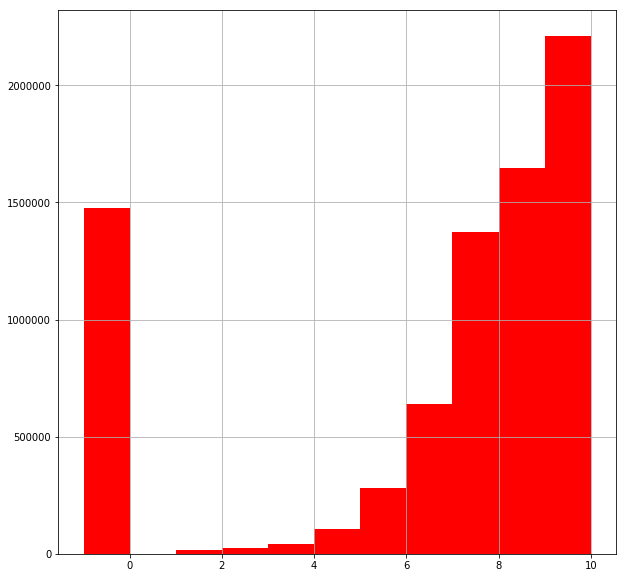

In [2]:
# ratingsのヒストグラムを作成
ratings['rating'].hist(bins=11, figsize=(10,10), color = 'red')

In [5]:
# membersの値が10,000より大きいデータのみに変更
anime = anime[anime['members'] > 10000]

In [6]:
# 欠損データの確認
anime.isnull().sum()

anime_id     0
name         0
genre        2
type         4
episodes     0
rating      43
members      0
dtype: int64

In [8]:
# 欠損データをdropna()でデータセットから取り除く
anime = anime.dropna()
# raitingの値が0以上のみ残す
ratings = ratings[ratings.rating >= 0]

In [9]:
# animeの基本統計量の確認
print(round(anime.describe(),2))
# ratingsの基本統計量の確認
print(round(ratings.describe(),2))

       anime_id   rating     members
count   2946.00  2946.00     2946.00
mean   11095.54     7.40    69634.10
std    10582.92     0.64    94915.28
min        1.00     2.37    10005.00
25%     1530.25     7.02    17967.00
50%     7886.00     7.42    35121.50
75%    18686.50     7.82    80520.00
max    34240.00     9.37  1013917.00
          user_id    anime_id      rating
count  6337241.00  6337241.00  6337241.00
mean     36747.91     8902.87        7.81
std      21013.40     8882.00        1.57
min          1.00        1.00        1.00
25%      18984.00     1239.00        7.00
50%      36815.00     6213.00        8.00
75%      54873.00    14075.00        9.00
max      73516.00    34475.00       10.00


In [10]:
# animeとratingsの2つのデータフレームをマージさせる
mergeddf = ratings.merge(anime, left_on = 'anime_id', right_on = 'anime_id', suffixes= ['_user', ''])
# 合体したデータフレームの最初の5行を表示
mergeddf.head()

,user_id,anime_id,rating_user,name,genre,type,episodes,rating,members
0,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
1,3,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
2,5,8074,2,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
3,12,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
4,14,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892


In [11]:
# mergeddfの基本統計量の確認
round(mergeddf.describe(),2)

,user_id,anime_id,rating_user,rating,members
count,5957004.00,5957004.00,5957004.00,5957004.00,5957004.00
mean,36665.80,9023.38,7.87,7.74,196030.78
std,21030.91,8920.21,1.54,0.62,191317.96
min,1.00,1.00,1.00,2.37,10005.00
25%,18911.00,1195.00,7.00,7.35,57029.00
50%,36534.00,6500.00,8.00,7.74,130689.00
75%,54851.00,14345.00,9.00,8.17,271484.00
max,73516.00,34240.00,10.00,9.37,1013917.00


In [12]:
# 不必要な項目と重複項目を削除
mergeddf = mergeddf[['user_id','name','rating_user']]
mergeddf = mergeddf.drop_duplicates(['user_id','name'])
# head()で最初の5行を表示
mergeddf.head()

,user_id,name,rating_user
0,1,Highschool of the Dead,10
1,3,Highschool of the Dead,6
2,5,Highschool of the Dead,2
3,12,Highschool of the Dead,6
4,14,Highschool of the Dead,6


In [13]:
# データフレームのピボット
anime_pivot = mergeddf.pivot(index= 'name',columns='user_id',values='rating_user').fillna(0)
anime_pivot_sparse = csr_matrix(anime_pivot.values)

In [20]:
# anime_pivotの最初の10行を表示
anime_pivot.head(10)

user_id,1,2,3,5,7,8,9,10,11,12,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Gift,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Intermezzo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Liminality,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Quantum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Scikit-learnのライブラリを利用します
# n_neiborsやalgorithm、metricなど重要なアーギュメントを設定しています
knn = NearestNeighbors(n_neighbors=9,algorithm= 'brute', metric= 'cosine')
# 前処理したデータセットでモデルを訓練
model_knn = knn.fit(anime_pivot_sparse)

In [29]:
# データセットのタイトルをキーワードで検索
def searchanime(string):
    print(anime_pivot[anime_pivot.index.str.contains(string)].index[0:])
searchanime('Naruto')

Index(['Boruto: Naruto the Movie',
       'Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi', 'Naruto',
       'Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!',
       'Naruto Movie 2: Dai Gekitotsu! Maboroshi no Chiteiiseki Dattebayo!',
       'Naruto Movie 3: Dai Koufun! Mikazuki Jima no Animaru Panikku Dattebayo!',
       'Naruto Narutimate Hero 3: Tsuini Gekitotsu! Jounin vs. Genin!! Musabetsu Dairansen taikai Kaisai!!',
       'Naruto SD: Rock Lee no Seishun Full-Power Ninden',
       'Naruto Shippuuden: Shippuu! &quot;Konoha Gakuen&quot; Den',
       'Naruto Shippuuden: Sunny Side Battle',
       'Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!!',
       'Naruto x UT', 'Naruto: Akaki Yotsuba no Clover wo Sagase',
       'Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo! Special: Konoha Annual Sports Festival',
       'Naruto: Honoo no Chuunin Shiken! Naruto vs. Konohamaru!!',
       'Naruto: Shippuuden Movie 1', 'Naru

In [23]:
Anime = 'Hajime no Ippo'
 
distance, indice = model_knn.kneighbors(anime_pivot.iloc[anime_pivot.index== Anime].values.reshape(1,-1),n_neighbors=11)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recommendations if you like the anime {0}:\n'.format(anime_pivot[anime_pivot.index== Anime].index[0]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,anime_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
 

Recommendations if you like the anime Hajime no Ippo:

1: Hajime no Ippo: New Challenger with distance: 0.16171263372777
2: Hajime no Ippo: Champion Road with distance: 0.30597377816318394
3: Hajime no Ippo: Mashiba vs. Kimura with distance: 0.34948858340614675
4: Hajime no Ippo: Rising with distance: 0.3635742899878238
5: Hajime no Ippo: Boxer no Kobushi with distance: 0.5808237633855784
6: Great Teacher Onizuka with distance: 0.6271421261955552
7: Shijou Saikyou no Deshi Kenichi with distance: 0.6428821544076411
8: Major S1 with distance: 0.6575993793656698
9: Major S2 with distance: 0.6623633646779645
10: One Outs with distance: 0.6644591854339764


In [31]:
Anime = 'Naruto'
 
distance, indice = model_knn.kneighbors(anime_pivot.iloc[anime_pivot.index== Anime].values.reshape(1,-1),n_neighbors=11)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recommendations if you like the anime {0}:\n'.format(anime_pivot[anime_pivot.index== Anime].index[0]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,anime_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
 

Recommendations if you like the anime Naruto:

1: Death Note with distance: 0.44815151601300474
2: Fullmetal Alchemist with distance: 0.5223248441198116
3: Bleach with distance: 0.5284777073449622
4: Fullmetal Alchemist: Brotherhood with distance: 0.5302955938928025
5: Code Geass: Hangyaku no Lelouch with distance: 0.5306948158335985
6: Sword Art Online with distance: 0.5307968338015507
7: Shingeki no Kyojin with distance: 0.5362968975112385
8: Dragon Ball Z with distance: 0.5425918533525473
9: Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo! with distance: 0.5463915214385635
10: Ao no Exorcist with distance: 0.5505920029303739
